In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#session.query(func.max(Measurement.date)).first()
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date

# Calculate the date one year from the last date in data set.
#year_ago = most_recent_date - dt.timedelta(days = 365)
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
prcp_query

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_query, columns = ['date', 'precipitation'])
prcp_df

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('date')
prcp_df


,date,precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [11]:
# check for missing values
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2223 non-null   object 
 1   precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.1+ KB


In [15]:
# drop nan using dropna
prcp_df.dropna(inplace = True)
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2015 non-null   object 
 1   precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.2+ KB


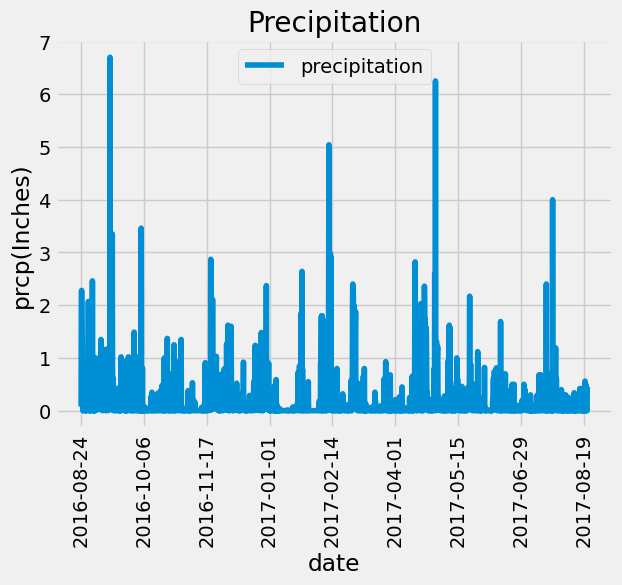

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x = 'date', y = 'precipitation', rot=90)

#adding title, y label
plt.title("Precipitation")
plt.ylabel('prcp(Inches)')

plt.savefig("./Images/Precp_2016_2017.png")
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()